Write a Python program that reads the “Credit Card Customer Data.csv”(provided on LMS) The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.Tasks to be performed:

1.Load the Given CSV file into a DataFrame

2.Find missing values and drop the unnecessary columns

3.Univariate and bivariate analysis

4.Standardize the whole dataset

5.Find the within-cluster sum of square

6.Find silhouette score

7.Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model

8.Observe Cluster behavior with different columns

9.Print Co-ordinates of all centroids and silhouette scores for the final model

In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

1.Load the Given CSV file into a DataFrame

In [2]:
data=pd.read_csv("D:\Shivam\study material\CSV\Credit Card Customer Data.csv")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
data.describe(include='all')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


2.Find missing values and drop the unnecessary columns

dataset had no missing values

In [5]:
data['Customer Key'].nunique()

655

### this seems that there are 655 unique key.

Sl_No is not giving any information that needed for model development

we don't need the same into our model

Removing the same from our dataset

In [6]:
data.drop(['Customer Key','Sl_No'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


3.Univariate and bivariate analysis

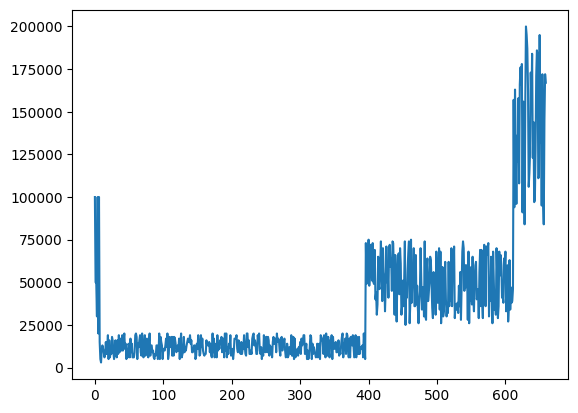

In [8]:
mp.plot(data['Avg_Credit_Limit'])
mp.show()

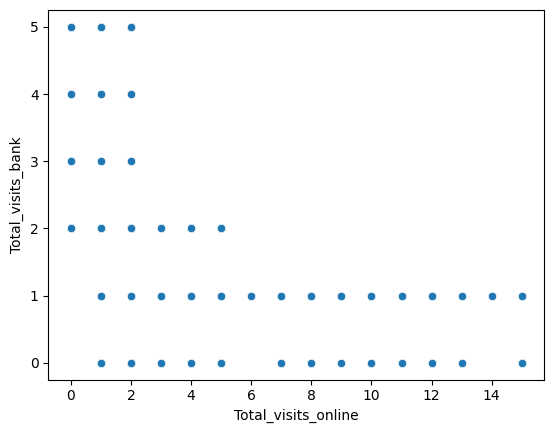

In [9]:
sns.scatterplot(x=data['Total_visits_online'],y=data['Total_visits_bank'])
mp.show()

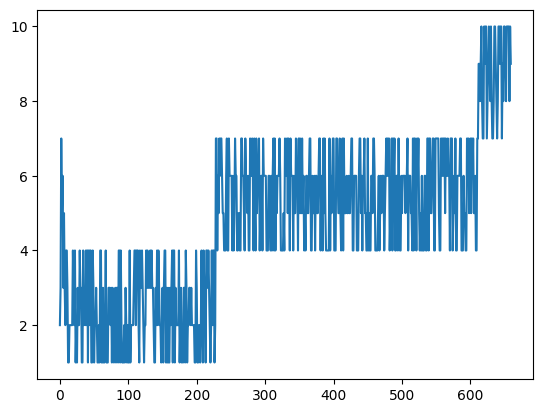

In [10]:
mp.plot(data['Total_Credit_Cards'])
mp.show()

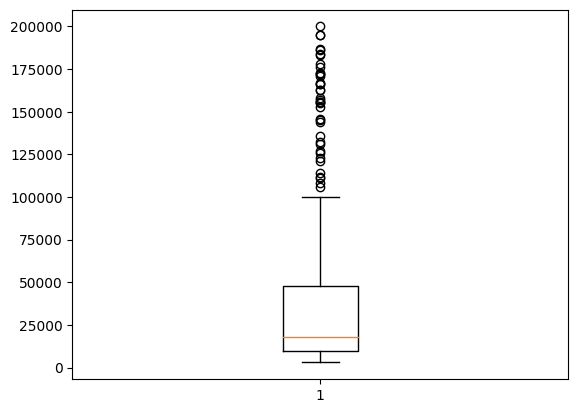

In [11]:
mp.boxplot(data['Avg_Credit_Limit'])
mp.show()

<AxesSubplot: xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

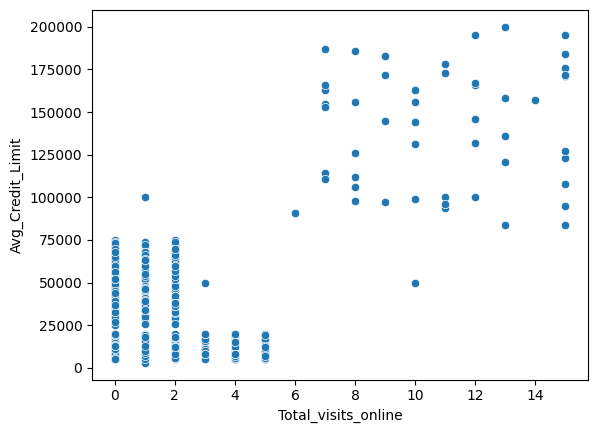

In [12]:
sns.scatterplot(x=data['Total_visits_online'],y=data['Avg_Credit_Limit'])

Lets cap the outliers

In [13]:
per_25=np.percentile(data['Avg_Credit_Limit'],25)
per_75=np.percentile(data['Avg_Credit_Limit'],75)
upper_per=per_75+1.5*(per_75-per_25)
lower_per=per_25-1.5*(per_75-per_25)

<AxesSubplot: >

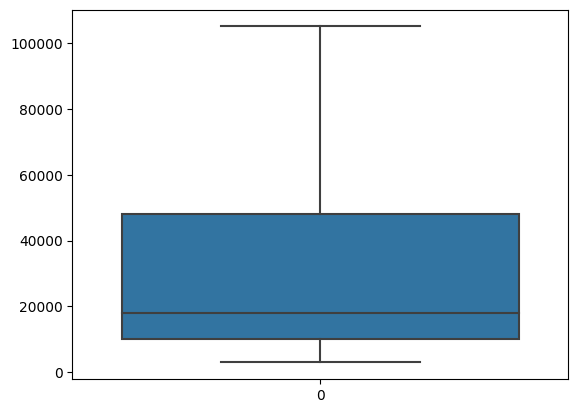

In [14]:
data['Avg_Credit_Limit']=np.where(data['Avg_Credit_Limit']>upper_per,upper_per,np.where(data['Avg_Credit_Limit']<lower_per,lower_per,data['Avg_Credit_Limit']))
sns.boxplot(data['Avg_Credit_Limit'])

ouliers need to be treated first

In [15]:
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.616470,-0.017170,0.431922,-0.452703
Total_Credit_Cards,0.616470,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.017170,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.431922,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.452703,-0.651251,-0.506016,0.127299,1.000000


4.Standardize the whole dataset

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data)
new=sc.transform(data)
data=pd.DataFrame(new,columns=data.columns)

In [17]:
data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.547490,-1.251537
1,0.643619,-0.787585,-1.473731,2.520519,1.891859
2,0.643619,1.058973,-0.860451,0.134290,0.145528
3,-0.058511,0.135694,-0.860451,-0.547490,0.145528
4,2.398942,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.520519,-1.251537
656,1.837238,2.443892,-0.860451,3.543188,-0.553005
657,2.574474,1.520613,-0.860451,2.179629,-0.902271
658,2.574474,2.443892,-0.860451,4.224968,-1.251537


7.Use a line plot using matplotlib to find scores for different sizes of K and choose the best size for the cluster and build the final model

In [18]:
from sklearn.cluster import KMeans

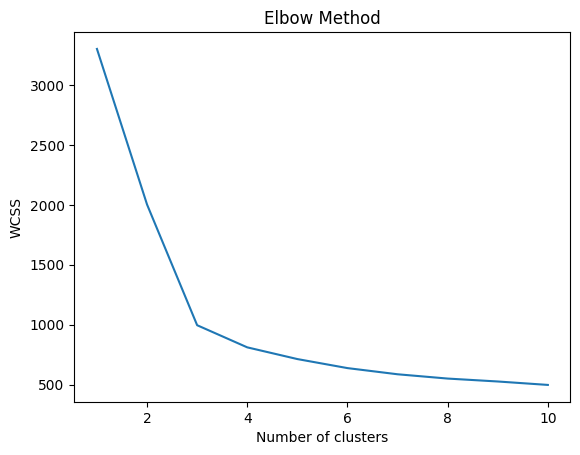

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
mp.plot(range(1, 11), wcss)
mp.title('Elbow Method')
mp.xlabel('Number of clusters')
mp.ylabel('WCSS')
mp.show()

#### Lets use the optimal number of clusters as 5


In [20]:
kmean=KMeans(n_clusters=5,random_state=True)
pred=kmean.fit_predict(data)



5.Find the within-cluster sum of square

In [21]:
wcc=kmean.inertia_
print("within-cluster sum of square",wcc)

within-cluster sum of square 713.88446751852


6.Find silhouette score

In [22]:
from sklearn.metrics import silhouette_score
print("silhouette Score",silhouette_score(data,kmean.labels_))


silhouette Score 0.3498899454362499


Print Co-ordinates of all centroids and silhouette scores for the final model

In [23]:
kmean.cluster_centers_

array([[-0.3537898 ,  0.35386621,  1.32383482, -0.52414108, -0.55778935],
       [ 2.49232493,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.68563989, -1.070864  , -0.90784046,  0.32952682,  1.17110029],
       [ 1.01762675,  0.37196631,  0.4433733 , -0.58775227, -0.54750463],
       [-0.43898083,  0.37243233,  0.04636531, -0.53583534, -0.53807898]])

In [24]:
# mp.sca